In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [2]:
data = pd.read_csv('HousingData.csv')

In [3]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [5]:
missing_values = data.isnull().sum()
print("Пропуски в данных:")
print(missing_values)

Пропуски в данных:
CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


In [11]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
total_count = data.shape[0]
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))


Колонка CRIM. Тип данных float64. Количество пустых значений 20, 3.95%.
Колонка ZN. Тип данных float64. Количество пустых значений 20, 3.95%.
Колонка INDUS. Тип данных float64. Количество пустых значений 20, 3.95%.
Колонка CHAS. Тип данных float64. Количество пустых значений 20, 3.95%.
Колонка AGE. Тип данных float64. Количество пустых значений 20, 3.95%.
Колонка LSTAT. Тип данных float64. Количество пустых значений 20, 3.95%.


In [29]:
strategies=['mean', 'median', 'most_frequent']
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
 
    filled_data = pd.DataFrame(data_num_imp, columns=[column])
    
    return column, strategy_param, mask_missing_values_only.sum(), filled_data[column][mask_missing_values_only[:, 0]].iloc[0], filled_data[column][mask_missing_values_only[:, 0]].iloc[-1]


In [42]:
imp_mean = SimpleImputer(strategy=strategies[0])
data['CRIM'] = imp_mean.fit_transform(data[['CRIM']])

In [39]:
imp_mean = SimpleImputer(strategy=strategies[0])
data['AGE'] = imp_mean.fit_transform(data[['AGE']])


In [40]:
imp_mean = SimpleImputer(strategy=strategies[0])
data['ZN'] = imp_mean.fit_transform(data[['ZN']])

In [43]:
missing_values = data.isnull().sum()
print("Пропуски в данных:")
print(missing_values)

Пропуски в данных:
CRIM        0
ZN          0
INDUS      20
CHAS       20
NOX         0
RM          0
AGE         0
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


MinMax масштабирование

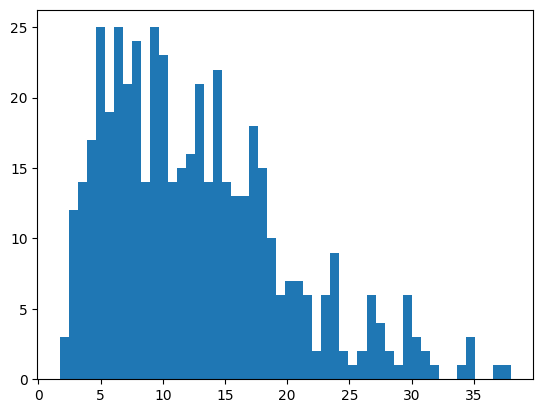

In [45]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['LSTAT']])
plt.hist(data['LSTAT'], 50)
plt.show()

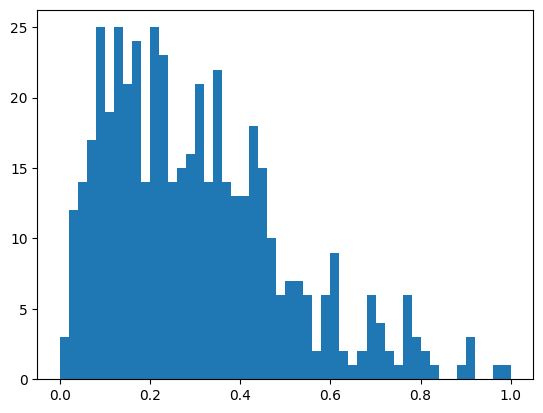

In [46]:
plt.hist(sc1_data, 50)
plt.show()

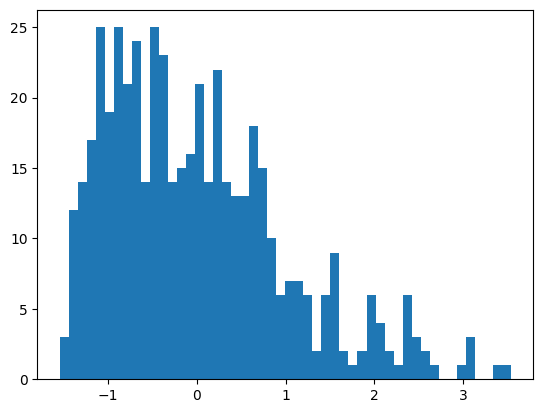

In [48]:
#Масштабирование данных на основе Z-оценки - StandardScaler
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['LSTAT']])
plt.hist(sc2_data, 50)
plt.show()#

Кодирование категориальных признаков;

In [5]:
toy_data = pd.read_csv('toy_dataset.csv')
toy_data.head()


,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,NaN,40367.0,No
1,2,Dallas,Male,54.0,45084.0,No
2,3,Dallas,Male,NaN,52483.0,No
3,4,Dallas,Male,40.0,40941.0,No
4,5,Dallas,Male,NaN,50289.0,No


In [7]:
# Применение Label Encoding к колонке 'Gender'
label_encoder = LabelEncoder()
toy_data['Gender'] = label_encoder.fit_transform(toy_data['Gender'])
toy_data['City'] = label_encoder.fit_transform(toy_data['City'])


In [8]:
toy_data.head()

,Number,City,Gender,Age,Income,Illness
0,1,2,1,NaN,40367.0,No
1,2,2,1,54.0,45084.0,No
2,3,2,1,NaN,52483.0,No
3,4,2,1,40.0,40941.0,No
4,5,2,1,NaN,50289.0,No
